##1.1 Оценки математического ожидания, дисперсии, медианы

$1$
a)

$
f_\xi(x) = \theta^2 x e^{-\theta x}$

* $\mathbb{E}(\xi) = \int_0^\infty x f_\xi(x) dx = \theta^2 \int_0^\infty x^2 e^{-\theta x} dx = \frac{1}{\theta}\int_0^\infty \theta x e^{-\theta x} \theta xdx$ =

$$
t = \theta x
$$

$\frac{1}{\theta} \int_0^\infty t^2 e^{-t} dt = \frac{1}{\theta} \Gamma(3) = {\frac{2}{\theta}}
$

* $\mathbb{E}(\xi^2) = \theta^2 \int_0^\infty x^3 e^{-\theta x} dx = \frac{1}{\theta^2} \int_0^\infty y^3 e^{-t} dt = \frac{\Gamma(4)}{\theta^2} = {\frac{6}{\theta^2}}
$

* $\mathbb{D}(\xi) = \mathbb{E}(\xi^2) - \mathbb{E}(\xi)^2 = \frac{6}{\theta^2} - \frac{4}{\theta^2} = {\frac{2}{\theta^2}}
$

При $\theta = 0.5$

$\mathbb{E}(\xi) = 1$; $\mathbb{E}(\xi^2) = 24$; $\mathbb{D}(\xi) = 8$

При $\theta = 8$

$\mathbb{E}(\xi) = {\frac{1}{4}}$; $\mathbb{E}(\xi^2) = {\frac{3}{32}}$; $\mathbb{D}(\xi) = {\frac{1}{32}}$

При $\theta = 2$

$\mathbb{E}(\xi) = 1$; $\mathbb{E}(\xi^2) = {\frac{3}{2}}$; $\mathbb{D}(\xi) = {\frac{1}{2}}$


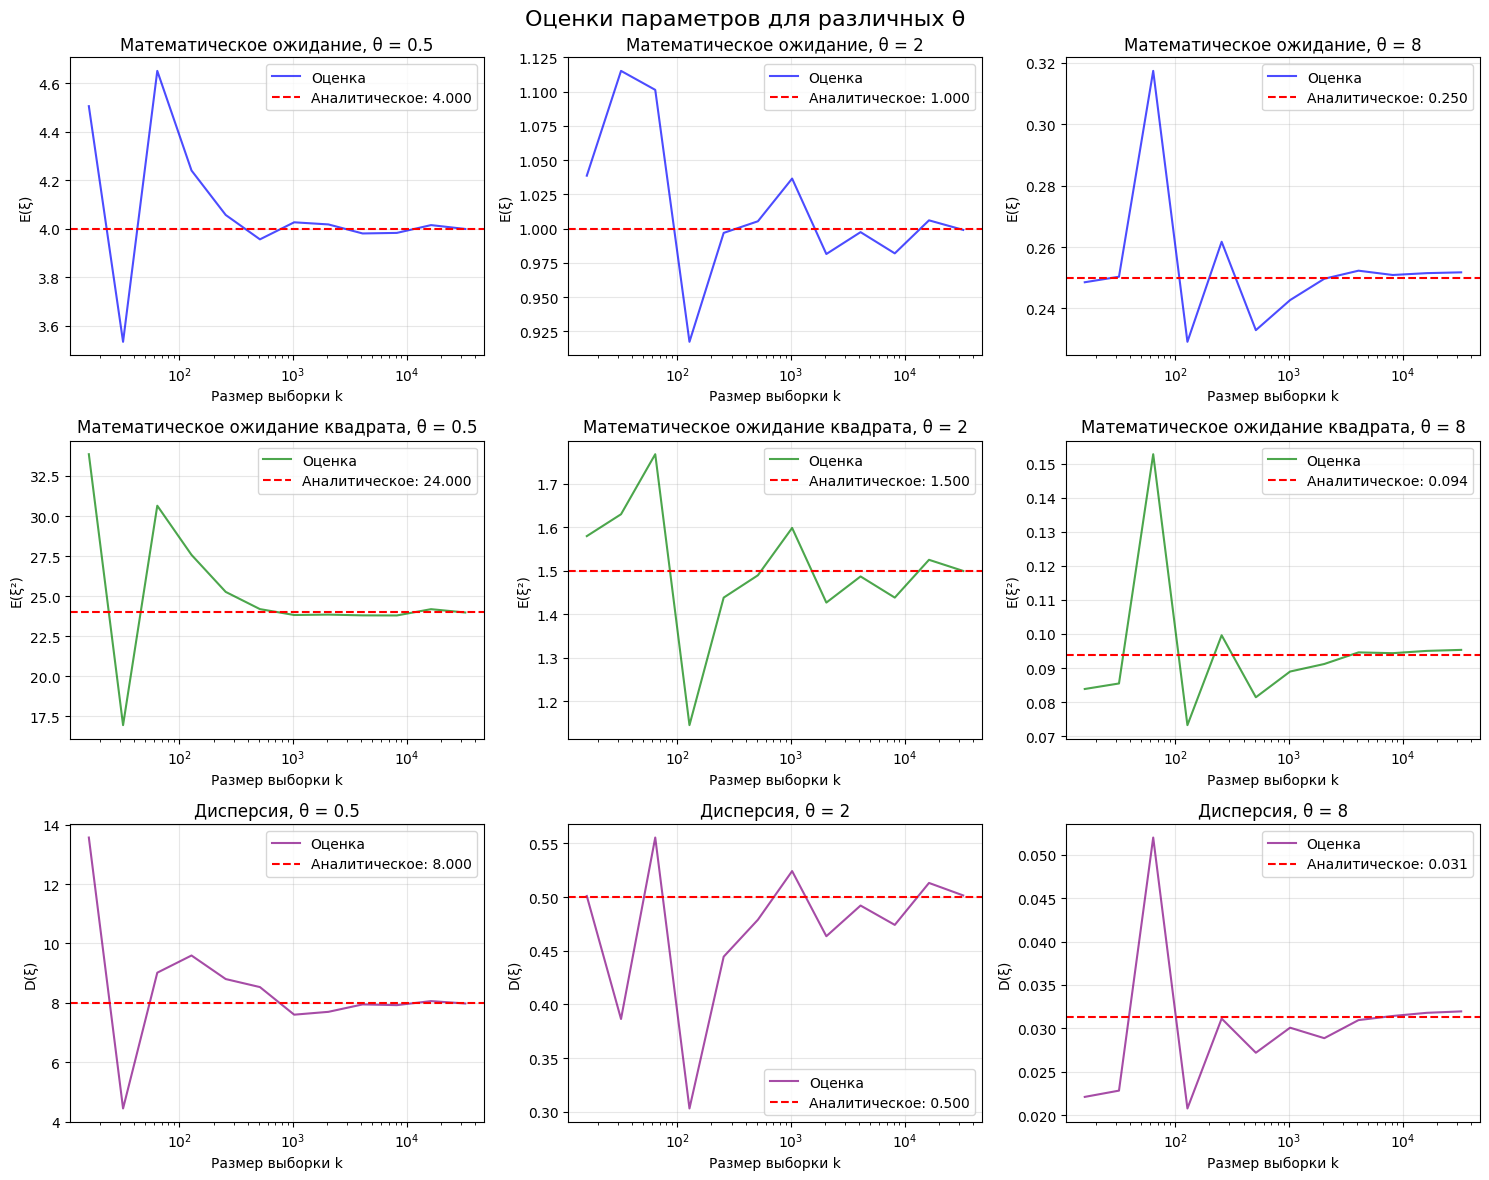

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
theta_values = [0.5, 2, 8]
k_values = [2**i for i in range(4, 16)]  # k от 2^4 до 2^15

# Аналитические значения (из предыдущих расчетов)
def analytical_values(theta):
    E_xi = 2 / theta
    E_xi2 = 6 / (theta**2)
    D_xi = 2 / (theta**2)
    return E_xi, E_xi2, D_xi

# Функция для генерации выборки из распределения f(x) = θ² x e^{-θx}
def generate_sample(theta, size):
    # Используем метод обратного преобразования или отбора
    # Для гамма-распределения с параметрами (2, 1/θ)
    return np.random.gamma(shape=2, scale=1/theta, size=size)

# Создаем графики
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Оценки параметров для различных θ', fontsize=16)

for i, theta in enumerate(theta_values):
    # Аналитические значения
    E_xi_analytical, E_xi2_analytical, D_xi_analytical = analytical_values(theta)

    # Массивы для хранения оценок
    E_xi_estimates = []
    E_xi2_estimates = []
    D_xi_estimates = []

    # Вычисляем оценки для каждого k
    for k in k_values:
        sample = generate_sample(theta, k)

        # Оценка математического ожидания
        E_xi_estimate = np.mean(sample)
        E_xi_estimates.append(E_xi_estimate)

        # Оценка математического ожидания квадрата
        E_xi2_estimate = np.mean(sample**2)
        E_xi2_estimates.append(E_xi2_estimate)

        # Оценка дисперсии
        D_xi_estimate = np.var(sample, ddof=0)  # смещенная оценка
        D_xi_estimates.append(D_xi_estimate)

    #матож
    axes[0, i].plot(k_values, E_xi_estimates, 'b-', alpha=0.7, label='Оценка')
    axes[0, i].axhline(y=E_xi_analytical, color='r', linestyle='--',
                      label=f'Аналитическое: {E_xi_analytical:.3f}')
    axes[0, i].set_xscale('log')
    axes[0, i].set_title(f'Математическое ожидание, θ = {theta}')
    axes[0, i].set_xlabel('Размер выборки k')
    axes[0, i].set_ylabel('E(ξ)')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

    #матожид квадрата
    axes[1, i].plot(k_values, E_xi2_estimates, 'g-', alpha=0.7, label='Оценка')
    axes[1, i].axhline(y=E_xi2_analytical, color='r', linestyle='--',
                      label=f'Аналитическое: {E_xi2_analytical:.3f}')
    axes[1, i].set_xscale('log')
    axes[1, i].set_title(f'Математическое ожидание квадрата, θ = {theta}')
    axes[1, i].set_xlabel('Размер выборки k')
    axes[1, i].set_ylabel('E(ξ²)')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

    # График для дисперсии
    axes[2, i].plot(k_values, D_xi_estimates, 'purple', alpha=0.7, label='Оценка')
    axes[2, i].axhline(y=D_xi_analytical, color='r', linestyle='--',
                      label=f'Аналитическое: {D_xi_analytical:.3f}')
    axes[2, i].set_xscale('log')
    axes[2, i].set_title(f'Дисперсия, θ = {theta}')
    axes[2, i].set_xlabel('Размер выборки k')
    axes[2, i].set_ylabel('D(ξ)')
    axes[2, i].legend()
    axes[2, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


$2.$

$$
f_\xi^{\lambda, a}(x) =
\begin{cases}
\lambda e^{-\lambda(x-a)}, & x \geq a \\
0, & \text{else}
\end{cases}
$$

$$
 \left( \lambda, a \right) = (2, 2)
$$

Т. к. мода — это значение случайной величины, которое встречается наиболее часто или имеет наибольшую плотность вероятности, то M = 2 (при такой x имеет наибольшую плотность вероятности)

Медиана:

$$
t = x - 2
$$

$\int_0^x 2 e^{-2(x-2)} d(x-2) = 2\int_0^x e^{-2t} dt = - e^{-2x} + 1 = \frac{1}{2}$

$$
-e^{-2x} = -\frac{1}{2}
$$

$$
-2x = ln\frac{1}{2}
$$

$$
x = \frac{-ln\frac{1}{2}}{2}
$$

$$
x = \frac{ln2}{2}
$$

$$
Me = \frac{ln2}{2} +  2
$$

$\mathbb{E}(\lambda, a) = \int_2^\infty 2 e^{-2(x-2)} x dx = \int_0^\infty 2 e^{-2x} x dx = \frac{1}{2}\int_0^\infty e^{-t} t dt + 2 = \frac{1}{2} + 2$

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\P'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\P'
<>:29: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-619160356.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, f_x, 'b-', linewidth=2, label=f'$f_\\xi^{{\lambda,a}}(x)$, $\lambda={lambda_val}$, $a={a}$')
/tmp/ipython-input-619160356.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, f_x, 'b-', linewidth=2, label=f'$f_\\xi^{{\lambda,a}}(x)$, $\lambda={lambda_val}$, $a={a}$')
/tmp/ipython-input-619160356.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$f_\\xi^{{\lambda,a}}(

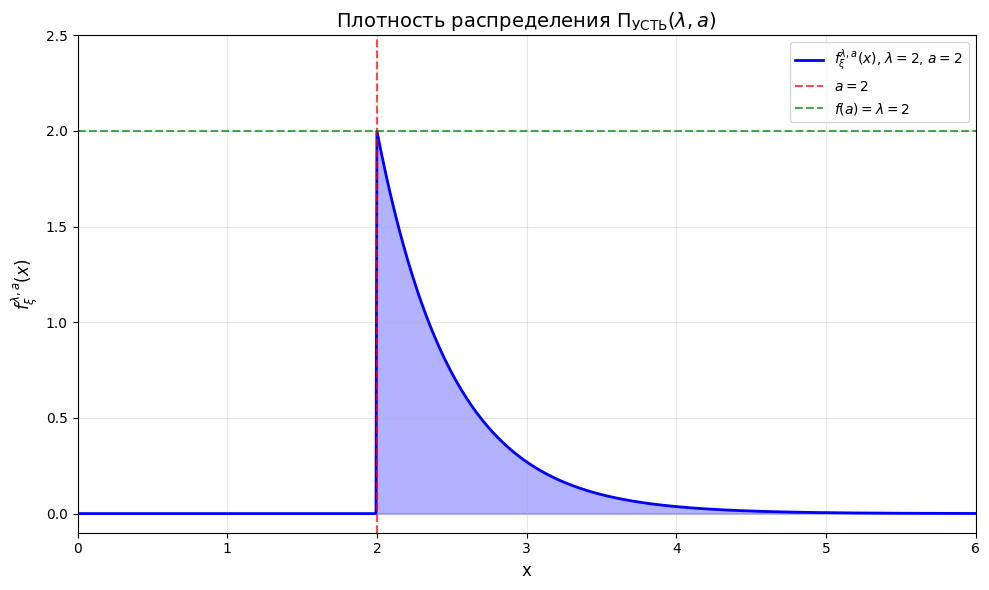

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры распределения
lambda_val = 2
a = 2

# Создаем массив x значений
x = np.linspace(0, 6, 1000)

# Вычисляем плотность распределения
f_x = np.zeros_like(x)
mask = x >= a  # условие x ≥ a
f_x[mask] = lambda_val * np.exp(-lambda_val * (x[mask] - a))

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, 'b-', linewidth=2, label=f'$f_\\xi^{{\lambda,a}}(x)$, $\lambda={lambda_val}$, $a={a}$')

# Настройки графика
plt.xlabel('x', fontsize=12)
plt.ylabel('$f_\\xi^{{\lambda,a}}(x)$', fontsize=12)
plt.title('Плотность распределения $\Pi_{\\text{УСТЬ}}(\lambda, a)$', fontsize=14)

# Вертикальная линия в точке a
plt.axvline(x=a, color='r', linestyle='--', alpha=0.7, label=f'$a = {a}$')

# Горизонтальная линия в точке lambda (значение в точке a)
plt.axhline(y=lambda_val, color='g', linestyle='--', alpha=0.7, label=f'$f(a) = \lambda = {lambda_val}$')

plt.xlim(0, 6)
plt.ylim(-0.1, 2.5)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Добавляем заливку под кривой (опционально)
x_fill = np.linspace(a, 6, 100)
y_fill = lambda_val * np.exp(-lambda_val * (x_fill - a))
plt.fill_between(x_fill, y_fill, alpha=0.3, color='blue')

plt.tight_layout()
plt.show()

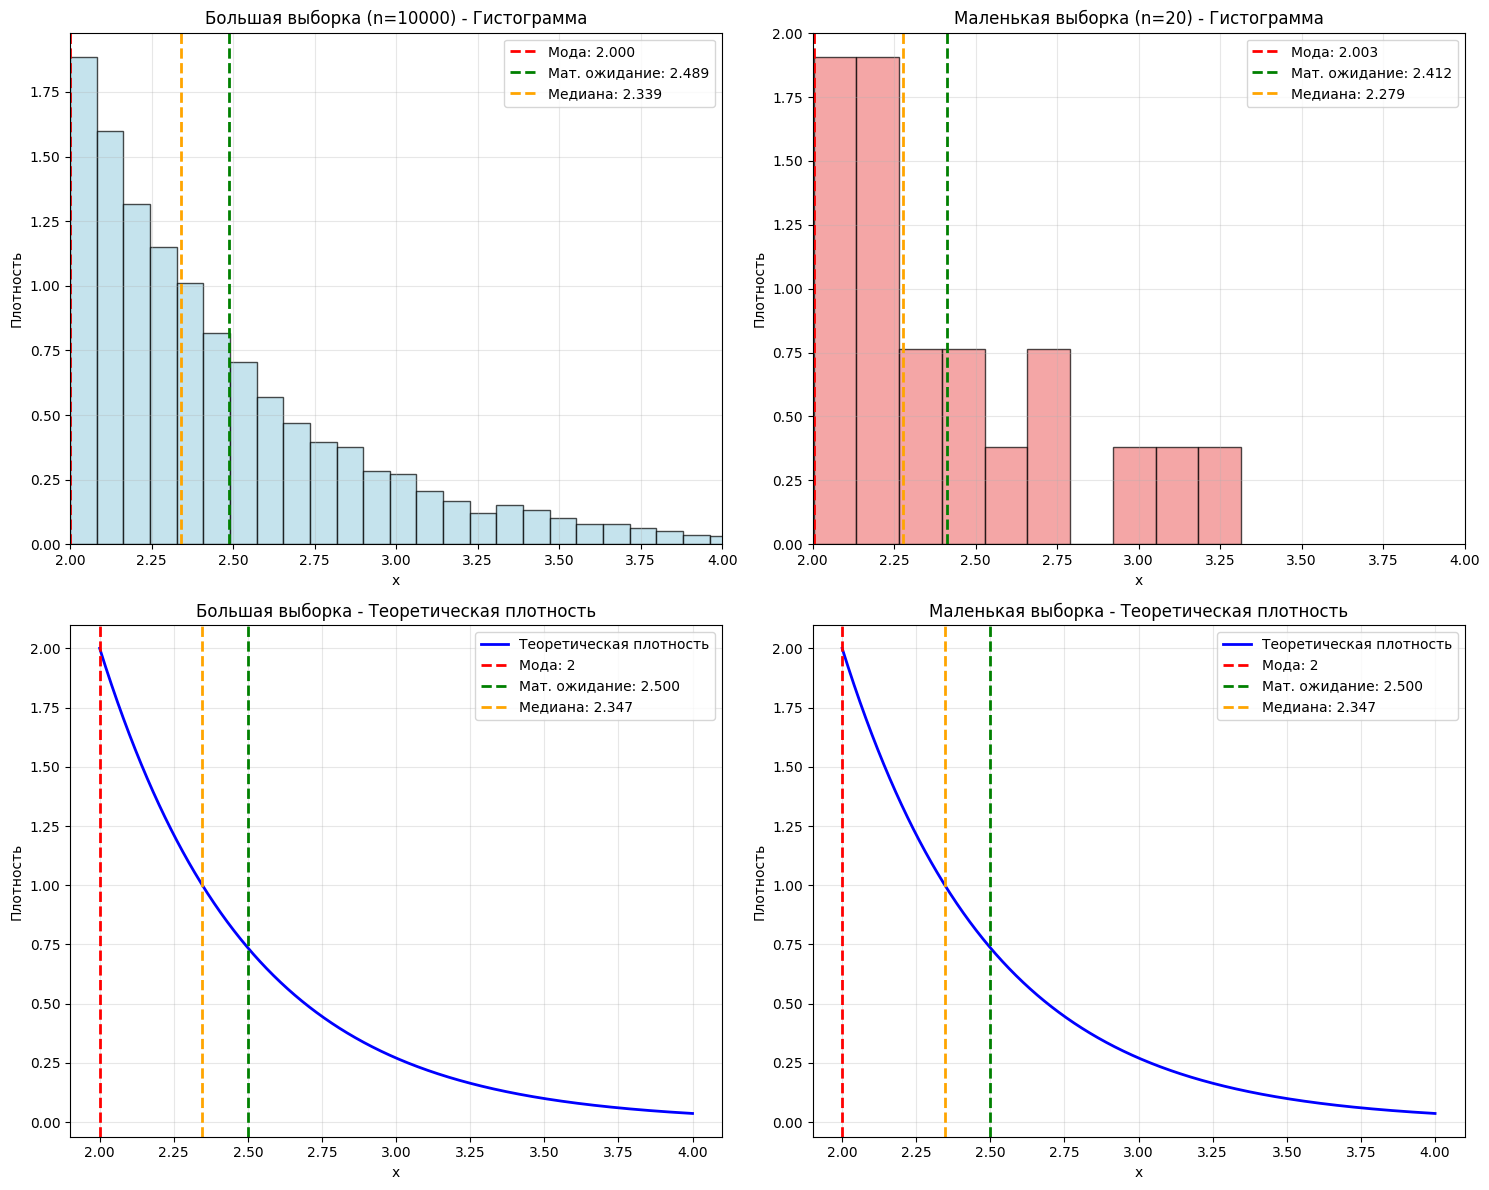

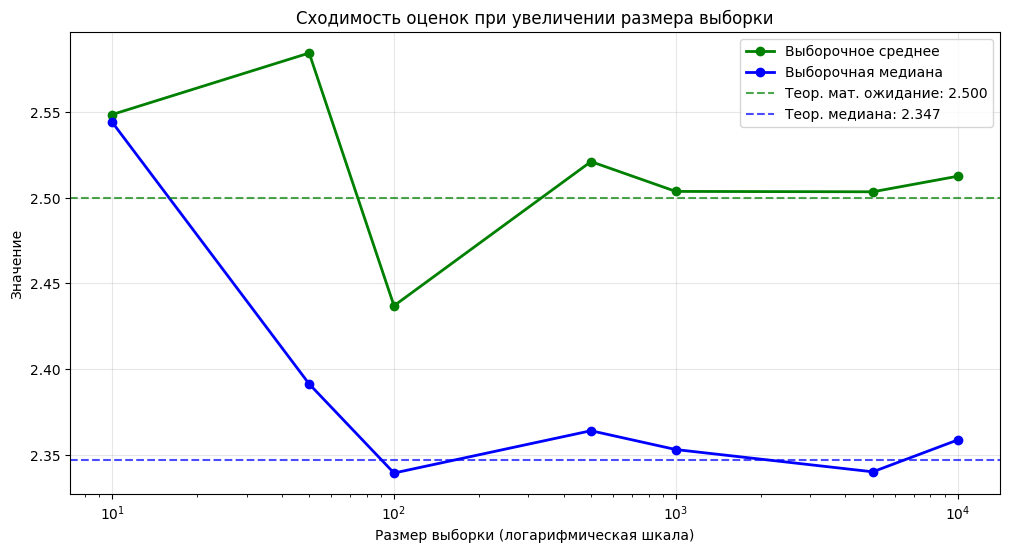

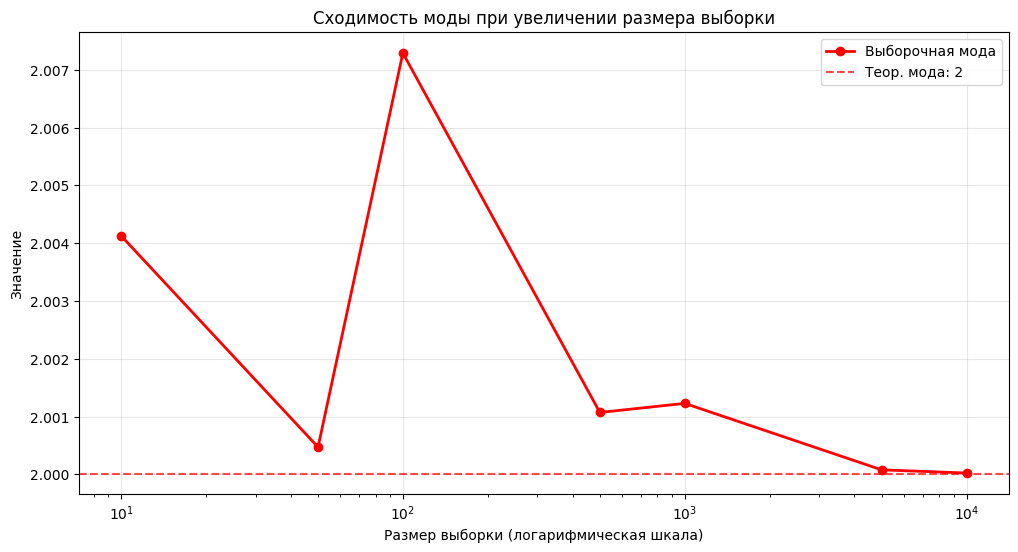

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Параметры распределения
lambda_val = 2
a = 2

# Мода - максимум плотности распределения
mode_analytical = a

# Математическое ожидание для сдвинутого экспоненциального распределения
mean_analytical = a + 1/lambda_val

# Медиана - значение, при котором функция распределения равна 0.5
median_analytical = a + np.log(2)/lambda_val

# (b) Создание выборок
np.random.seed(42)

# Большая выборка
sample_large = expon.rvs(scale=1/lambda_val, loc=a, size=10000)

# Маленькая выборка
sample_small = expon.rvs(scale=1/lambda_val, loc=a, size=20)

# Оценки для большой выборки
# Для моды используем значение с максимальной плотностью вероятности
mode_large = sample_large[np.argmax(expon.pdf(sample_large, scale=1/lambda_val, loc=a))]
mean_large = np.mean(sample_large)
median_large = np.median(sample_large)

# Оценки для маленькой выборки
mode_small = sample_small[np.argmax(expon.pdf(sample_small, scale=1/lambda_val, loc=a))]
mean_small = np.mean(sample_small)
median_small = np.median(sample_small)

# (c) Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Большая выборка - гистограмма
axes[0, 0].hist(sample_large, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].axvline(mode_large, color='red', linestyle='--', linewidth=2, label=f'Мода: {mode_large:.3f}')
axes[0, 0].axvline(mean_large, color='green', linestyle='--', linewidth=2, label=f'Мат. ожидание: {mean_large:.3f}')
axes[0, 0].axvline(median_large, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_large:.3f}')
axes[0, 0].set_title('Большая выборка (n=10000) - Гистограмма')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('Плотность')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(a, a + 4/lambda_val)

# Маленькая выборка - гистограмма
axes[0, 1].hist(sample_small, bins=10, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(mode_small, color='red', linestyle='--', linewidth=2, label=f'Мода: {mode_small:.3f}')
axes[0, 1].axvline(mean_small, color='green', linestyle='--', linewidth=2, label=f'Мат. ожидание: {mean_small:.3f}')
axes[0, 1].axvline(median_small, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_small:.3f}')
axes[0, 1].set_title('Маленькая выборка (n=20) - Гистограмма')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(a, a + 4/lambda_val)

# Большая выборка - теоретическая плотность с аналитическими значениями
x = np.linspace(a, a + 4/lambda_val, 1000)
pdf = expon.pdf(x, scale=1/lambda_val, loc=a)

axes[1, 0].plot(x, pdf, 'b-', linewidth=2, label='Теоретическая плотность')
axes[1, 0].axvline(mode_analytical, color='red', linestyle='--', linewidth=2, label=f'Мода: {mode_analytical}')
axes[1, 0].axvline(mean_analytical, color='green', linestyle='--', linewidth=2, label=f'Мат. ожидание: {mean_analytical:.3f}')
axes[1, 0].axvline(median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_analytical:.3f}')
axes[1, 0].set_title('Большая выборка - Теоретическая плотность')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Плотность')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Маленькая выборка - теоретическая плотность с аналитическими значениями
axes[1, 1].plot(x, pdf, 'b-', linewidth=2, label='Теоретическая плотность')
axes[1, 1].axvline(mode_analytical, color='red', linestyle='--', linewidth=2, label=f'Мода: {mode_analytical}')
axes[1, 1].axvline(mean_analytical, color='green', linestyle='--', linewidth=2, label=f'Мат. ожидание: {mean_analytical:.3f}')
axes[1, 1].axvline(median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_analytical:.3f}')
axes[1, 1].set_title('Маленькая выборка - Теоретическая плотность')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# (d) Исследование сходимости при разных размерах выборки
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
means = []
medians = []
modes = []

for size in sample_sizes:
    sample = expon.rvs(scale=1/lambda_val, loc=a, size=size)
    means.append(np.mean(sample))
    medians.append(np.median(sample))
    modes.append(sample[np.argmax(expon.pdf(sample, scale=1/lambda_val, loc=a))])

# График сходимости среднего и медианы
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, means, 'go-', linewidth=2, markersize=6, label='Выборочное среднее')
plt.plot(sample_sizes, medians, 'bo-', linewidth=2, markersize=6, label='Выборочная медиана')
plt.axhline(y=mean_analytical, color='g', linestyle='--', alpha=0.7, label=f'Теор. мат. ожидание: {mean_analytical:.3f}')
plt.axhline(y=median_analytical, color='b', linestyle='--', alpha=0.7, label=f'Теор. медиана: {median_analytical:.3f}')
plt.xscale('log')
plt.xlabel('Размер выборки (логарифмическая шкала)')
plt.ylabel('Значение')
plt.title('Сходимость оценок при увеличении размера выборки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# График сходимости моды
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, modes, 'ro-', linewidth=2, markersize=6, label='Выборочная мода')
plt.axhline(y=mode_analytical, color='r', linestyle='--', alpha=0.7, label=f'Теор. мода: {mode_analytical}')
plt.xscale('log')
plt.xlabel('Размер выборки (логарифмическая шкала)')
plt.ylabel('Значение')
plt.title('Сходимость моды при увеличении размера выборки')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


##1.2 Моделирование совместного распределения двух СВ

Маргинальное распределение $\xi$

$\xi: -1;$
$p: \frac{2}{5}$

$\xi: 0;$
$p: \frac{1}{5}$

$\xi: 1;$
$p: \frac{2}{5}$

Маргинальное распределение $\eta$

$\xi: k;$
$p: \frac{1}{2^{k}}$

Мат. ожидание

$\mathbb{E}(\xi) = -1 * \frac{2}{5} + 0 * \frac{1}{5} + 1 *\frac{2}{5} = 0$

$\mathbb{E}(\eta) = \sum_{i=1}^\infty k\frac{1}{2^{k}}$

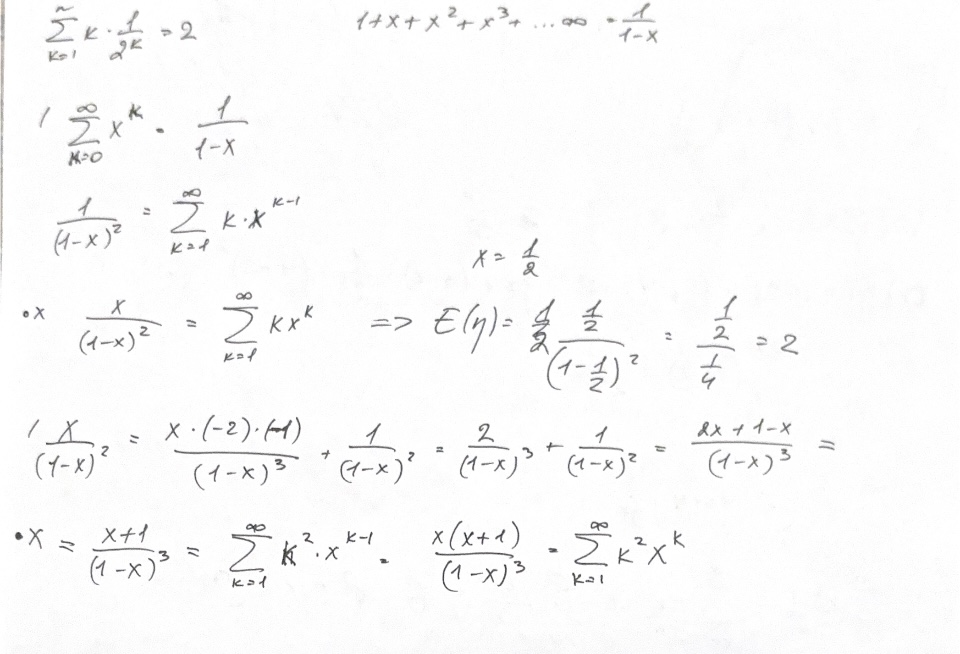

$\mathbb{D}(\xi) = (-1)^{2}\frac{2}{5} + (1)^{2}\frac{2}{5} = \frac{4}{5}$

$\mathbb{D}(\eta) = \sum_{k=1}^\infty (k-2)^{2}\frac{1}{2^{k}} = 6 - 8 + 4 = 2$

$\mathbb{cov}(\xi;\eta) = (1-2)\frac{1}{2}(-1)\frac{2}{5} + (1-2)\frac{1}{2}*0 + (1-2)\frac{1}{2}\frac{2}{5} = 0$

$cov_{\xi,\eta} =
 \begin{pmatrix}
  \frac{4}{5} & 0 \\
  0 & 2\\
 \end{pmatrix}$

 $cor_{\xi,\eta} =
 \begin{pmatrix}
  1 & 0 \\
  0 & 1\\
 \end{pmatrix}$

In [7]:
import numpy as np

# Параметры распределения
c = {-1: 2/5, 0: 1/5, 1: 2/5}
xi_values = [-1, 0, 1]

def sample_xi_eta(n=100000):
    eta = np.random.geometric(0.5, size=n)

    probs = [c[-1], c[0], c[1]]
    xi = np.random.choice(xi_values, size=n, p=probs)

    return xi, eta

#выборка
np.random.seed(42)
xi, eta = sample_xi_eta(100000)

#средние
mean_xi = np.mean(xi)
mean_eta = np.mean(eta)

#дисперсии
var_xi = np.var(xi, ddof=1)
var_eta = np.var(eta, ddof=1)

cov_xi_eta = np.cov(xi, eta, ddof=1)[0, 1]

corr_matrix = np.cov([xi, eta], ddof=1)

print(corr_matrix)

[[0.8001375  0.00284597]
 [0.00284597 1.96965549]]
